1. **Linear** **Regression**

In [112]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [113]:
df = pd.read_csv("/content/drive/MyDrive/ML_Self/placement.csv")
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package')

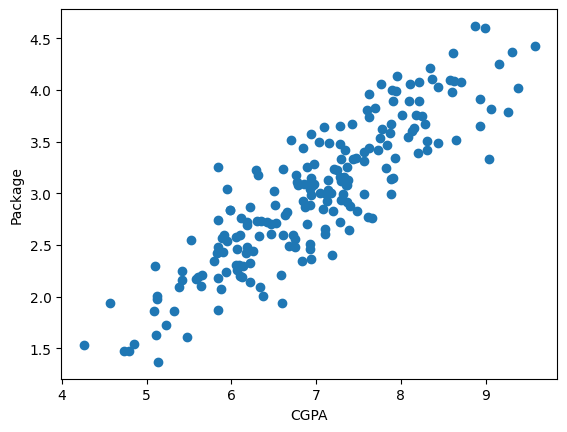

In [114]:
plt.scatter(df['cgpa'], df['package'])
plt.xlabel('CGPA')
plt.ylabel("Package")

In [115]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

print(X)
print(y)

     cgpa
0    6.89
1    5.12
2    7.82
3    7.42
4    6.94
..    ...
195  6.93
196  5.89
197  7.21
198  7.63
199  6.22

[200 rows x 1 columns]
0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64


In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

print(X_train)
print(X_test)
print(y_train)
print(y_test)

     cgpa
137  7.14
163  8.93
111  5.42
123  5.10
109  7.77
..    ...
43   7.66
22   6.14
72   7.78
15   7.25
168  8.65

[160 rows x 1 columns]
     cgpa
112  8.58
29   7.15
182  5.88
199  6.22
193  4.57
85   4.79
10   5.32
54   6.86
115  8.35
35   6.87
12   8.94
92   7.90
13   6.93
126  5.91
174  7.32
2    7.82
44   5.09
3    7.42
113  6.94
14   7.73
23   6.19
25   7.28
6    6.73
134  7.20
165  8.21
173  6.75
45   7.87
65   7.60
48   8.63
122  5.12
178  8.15
64   7.36
9    8.31
57   6.60
78   6.59
71   7.47
128  7.93
176  6.29
131  6.37
53   6.47
137    3.13
163    3.91
111    2.25
123    2.30
109    4.06
       ... 
43     2.76
22     2.30
72     3.62
15     3.23
168    3.52
Name: package, Length: 160, dtype: float64
112    4.10
29     3.49
182    2.08
199    2.33
193    1.94
85     1.48
10     1.86
54     3.09
115    4.21
35     2.87
12     3.65
92     4.00
13     2.89
126    2.60
174    2.99
2      3.25
44     1.86
3      3.67
113    2.37
14     3.42
23     2.48
25     3.65
6      

In [117]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train) #training

# X_test.iloc[0] -> dataframe of first row of dataset
# X_test.iloc[0].values -> convert it to array of values of this dataframe which can contain multiple attributes
# X_test.iloc[0].values.reshape(1,1) -> convert to 2d array

LinearRegression()

In [118]:
lr.predict(X_test.iloc[0].values.reshape(1,1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.89111601])

Text(0, 0.5, 'Package')

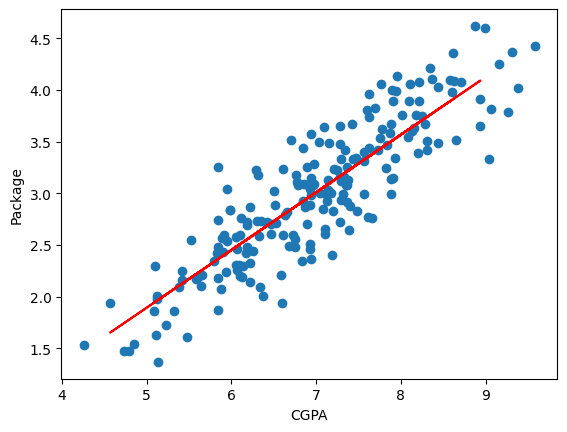

In [119]:
plt.scatter(df['cgpa'], df['package'])
plt.plot(X_test, lr.predict(X_test), color='red')
plt.xlabel('CGPA')
plt.ylabel("Package")

In [120]:
m = lr.coef_
c = lr.intercept_
print(m, c)

[0.55795197] -0.8961119222429144


In [121]:
# Metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

n = len(df.values)
print(n)
k = 1

mae = mean_absolute_error(y_test, lr.predict(X_test))
mse = mean_squared_error(y_test, lr.predict(X_test))
rmse = np.sqrt(mse)
r2 = r2_score(y_test, lr.predict(X_test))
adj_r2 = 1-(((1-r2)*(n-1))/(n-1-k))

print(mae, mse, rmse, r2, adj_r2)

200
0.2884710931878175 0.12129235313495527 0.34827051717731616 0.780730147510384 0.7796227240129617


In [122]:
# How value changes of adj_r2 on adding irrevelant attribute

df1 = df.copy()
df1["random"] = np.random.random(200)
df1 = df1[['cgpa', 'random', 'package']]

df1.head(200)

,cgpa,random,package
0,6.89,0.706713,3.26
1,5.12,0.800454,1.98
2,7.82,0.554172,3.25
3,7.42,0.368740,3.67
4,6.94,0.259595,3.57
...,...,...,...
195,6.93,0.613122,2.46
196,5.89,0.474121,2.57
197,7.21,0.890972,3.24
198,7.63,0.112962,3.96


Text(0, 0.5, 'CGPA')

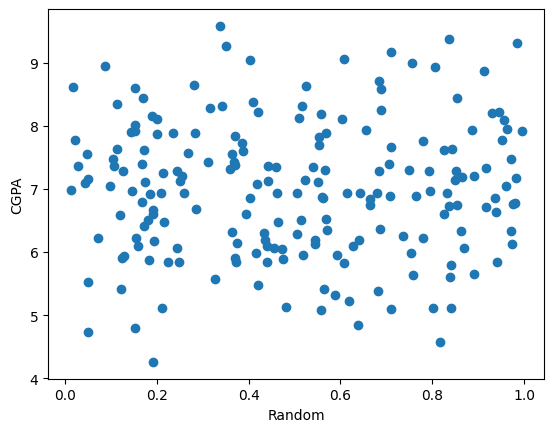

In [123]:
plt.scatter(df1["random"], df1["cgpa"])
plt.xlabel("Random")
plt.ylabel("CGPA")

Text(0, 0.5, 'Package')

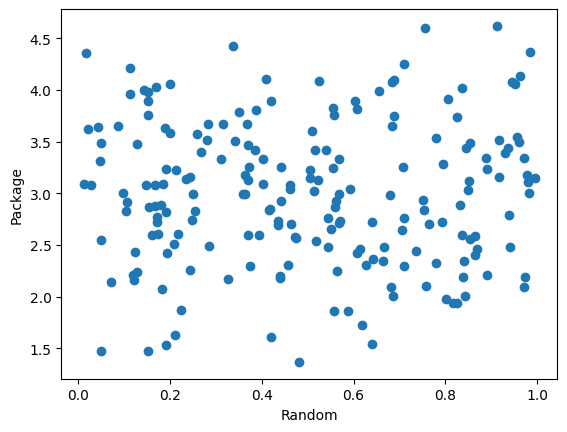

In [124]:
plt.scatter(df1["random"], df1['package'])
plt.xlabel("Random")
plt.ylabel("Package")

In [125]:
X = df1.iloc[:,0:2]
y = df1.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

lr = LinearRegression()
lr.fit(X_train, y_train)

n = len(df1.values)
k = 2

mae = mean_absolute_error(y_test, lr.predict(X_test))
mse = mean_squared_error(y_test, lr.predict(X_test))
rmse = np.sqrt(mse)
r2 = r2_score(y_test, lr.predict(X_test))
adj_r2 = 1-(((1-r2)*(n-1))/(n-1-k))

print(mae, mse, rmse, r2, adj_r2)

0.28848151907056346 0.12122044873653684 0.3481672712024162 0.780860134821431 0.7786353646165725


In [126]:
# How value changes of adj_r2 on adding revelant attribute

df1 = df.copy()
df1["iq"] = df['package'] + (np.random.randint(-12,12,200) / 10)
df1 = df1[['cgpa', 'iq', 'package']]

df1.head(200)

,cgpa,iq,package
0,6.89,3.46,3.26
1,5.12,2.48,1.98
2,7.82,2.15,3.25
3,7.42,3.47,3.67
4,6.94,2.77,3.57
...,...,...,...
195,6.93,2.56,2.46
196,5.89,2.77,2.57
197,7.21,2.54,3.24
198,7.63,3.26,3.96


Text(0, 0.5, 'CGPA')

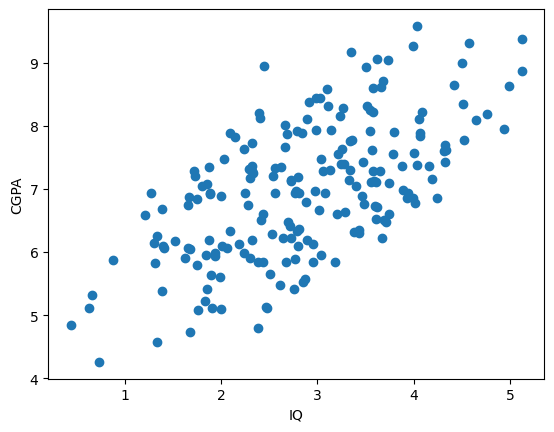

In [127]:
plt.scatter(df1["iq"], df1["cgpa"])
plt.xlabel("IQ")
plt.ylabel("CGPA")

Text(0, 0.5, 'Package')

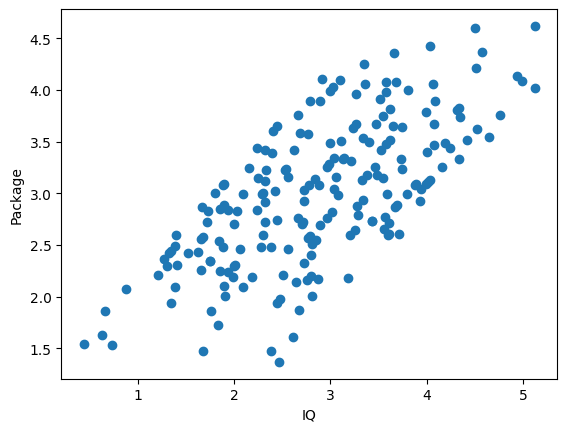

In [128]:
plt.scatter(df1["iq"], df1["package"])
plt.xlabel("IQ")
plt.ylabel("Package")

In [129]:
X = df1.iloc[:,0:2]
y = df1.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

lr = LinearRegression()
lr.fit(X_train, y_train)

n = len(df1.values)
k = 2

mae = mean_absolute_error(y_test, lr.predict(X_test))
mse = mean_squared_error(y_test, lr.predict(X_test))
rmse = np.sqrt(mse)
r2 = r2_score(y_test, lr.predict(X_test))
adj_r2 = 1-(((1-r2)*(n-1))/(n-1-k))

print(mae, mse, rmse, r2, adj_r2)

0.23330389008885372 0.08980294318235818 0.29967139199856596 0.8376560632571793 0.836007901462836
